<a href="https://colab.research.google.com/github/21nick/HTML_Template-EX/blob/add-21nick/Copy_of_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop: Machine Learning
Colgate University\
*Colgate Coders*

Machine learning is becoming ever more relevant in a world where big data drives decisions. In this workshop we will develop, train, and evaluate a feed forward neural network to make predictions on images. We will be working with libraries such as TensorFlow and Keras to take a supervised deep learning approach to a typical classification problem

## Introduction

The purpose of this workshop is for you to learn how to design and train a feedforward neural network in Keras. We will then use this network to classify images in the CIFAR-10 dataset.

CIFAR-10 is a well-known image classification dataset for practicing ML algorithms. You can read the description of the dataset here: https://www.cs.toronto.edu/\%7Ekriz/cifar.html

## Part 1: Data Import and Exploration

The following cell imports all libraries needed for Parts 1-3, loads the CIFAR-10 dataset, and splits the data into training and test sets:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as ks

np.random.seed(0) # set random seeds so everyone gets same results
tf.random.set_seed(1)

cifar10 = ks.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels,  test_labels = train_labels.flatten(), test_labels.flatten()

class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

170498071/170498071 [==============================] - 5s 0us/step


Lets check the shape of our data so can we better understand how its formatted:

In [3]:
#print the shape of our data
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000,)


Next lets see how many of each class we have in the labels:

In [ ]:
#check how many each class has
print(np.unique(train_labels, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


Lets see what an image and corresponding label look like:

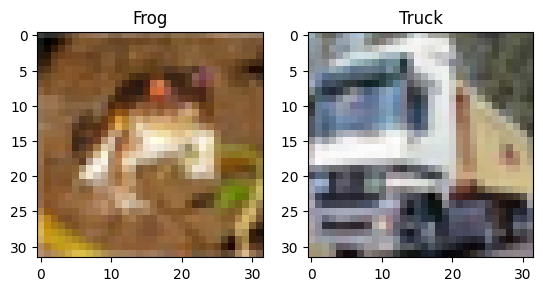

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)


axes[0].imshow(train_images[0])
axes[0].set_title(class_names[train_labels[0]])


axes[1].imshow(train_images[1])
axes[1].set_title(class_names[train_labels[1]])

plt.show()

## Part 2: Neural Networks 101

Below is a perceptron or an artifical neuron. These form the basis of neural networks. Like real neurons they take in multiple inputs and output a single value.

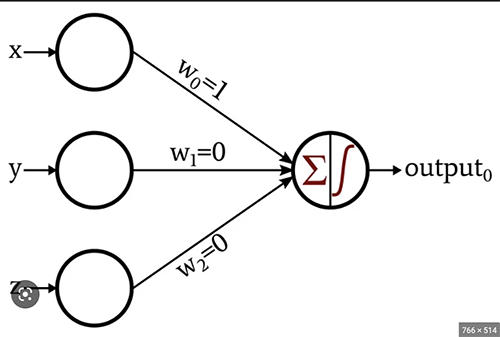

The neuron above can be represented by the following equation:

output0 = activation function((x*w0) + (y *w1) + (z*w2) + bias)

Many neurons connect to form a network! Together they can make predictions and model complex problems.

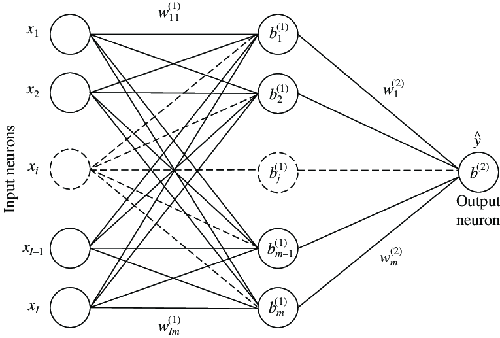

In our case we will feed the images that we want to classify as input to our network, the output will then be the predicted class of the image and one of the following:

"Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"

## How do these networks learn?
Good you asked! Once we have the network architecture built it "learns" by adjusting the weights and bias values for each layer until it produces predictions that match our labels. This process is called backpropigation and it involves a lot of confusing math! Lets summarize it below:



1.   Initialization: First, the weights and biases of the FNN are randomly initialized. These values serve as the initial parameters of the network and determine how the input data is transformed as it passes through the network.

2.   Forward Propagation: During the training process, input data is fed into the FNN, and the activations of the neurons are computed in a forward direction from the input layer to the output layer. This is known as forward propagation. The activations are computed using a set of mathematical operations that involve the weights, biases, and activation functions associated with each neuron.

3. Compute Loss: After the forward propagation, the output of the FNN is compared to the ground truth or target values. The difference between the predicted output and the ground truth is measured using a loss function, which quantifies the error of the predictions. Common loss functions include mean squared error (MSE) for regression tasks and cross-entropy loss for classification tasks.

4. Backward Propagation: Once the loss is computed, the FNN updates its weights and biases in a process called backward propagation or backpropagation. The gradients of the loss with respect to the activations of the neurons are computed, and these gradients are then used to update the weights and biases in the opposite direction of the gradient using an optimization algorithm, such as gradient descent or one of its variants. The optimization algorithm adjusts the weights and biases to minimize the loss and improve the accuracy of the predictions.
5. Repeat: Steps 2-4 are repeated for multiple iterations or epochs, where each epoch consists of a complete pass through the entire training dataset. The FNN continues to adjust its weights and biases based on the gradients of the loss until a certain stopping criterion is met, such as reaching a maximum number of epochs or achieving a desired level of accuracy on a validation set.



## Part 2: Model Creation

Now that we understand our data and task lets start creating a model that can solve the problem:

In [5]:
#Create a new model instance
models = ks.Sequential()

Our images are comprised of 3 dimensions, 32x32 pixels and 3 color channels (RGB) so 32x32x3. Our network expects one dimensional input so we need to flatten each image before passing it to the network.

In [10]:
#add a flatten layer
models.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))

In the diagram below each circle is perceptron as mentioned earlier

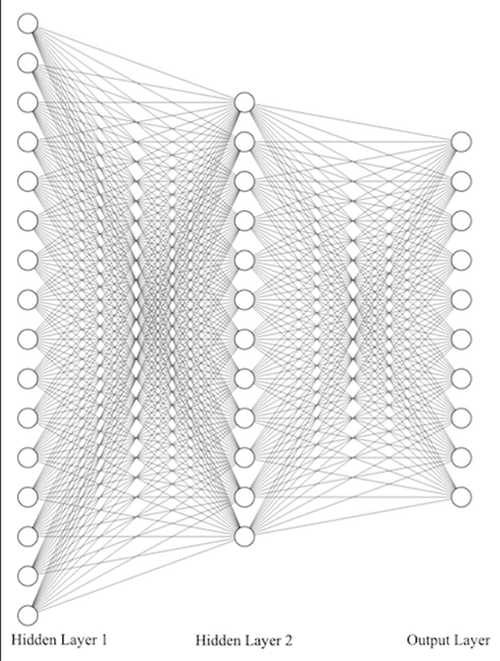

Lets construct the network above!

In [ ]:
#add some dense layers
models.add(tf.keras.layers.Dense(16, activate)

We can use .summary to show the model:

In [ ]:
#print a summary
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 16)                49168     
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 10)                130       
                                                                 
Total params: 49,502
Trainable params: 49,502
Non-trainable params: 0
_________________________________________________________________


Lets compile the model and then train it:

In [ ]:
#compile then train the model!!
models.compile(
    optimizer = "adam",
    loss = "SparseCategoricalCrossentropy",
    metries = "accuracy"
)

models.fit(train_images, train_labels, epochs=20, validation_split=0.15)

Epoch 1/20
1329/1329 [==============================] - 5s 3ms/step - loss: 2.9433 - accuracy: 0.1003 - val_loss: 2.3030 - val_accuracy: 0.0975
Epoch 2/20
1329/1329 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.1015
Epoch 3/20
1329/1329 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1329/1329 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.0972
Epoch 5/20
1329/1329 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0953
Epoch 6/20
1329/1329 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.0984
Epoch 7/20
1329/1329 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy:

##What happened why is our model so bad? :(
  It turns out that our model performed just about as good as a random guess ~10% validation accuracy. Lets see if we can improve this!

In [ ]:
model = ks.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(ks.layers.BatchNormalization())

for i in [128, 64, 32]:
  model.add(tf.keras.layers.Dense(i, activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.Dropout(rate=0.1))
  model.add(ks.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))
model.compile(
    optimizer='adam',
    loss="SparseCategoricalCrossentropy",
    metrics="accuracy"
)
model.fit(train_images, train_labels , epochs=25, validation_split=0.15, batch_size= 175)

Epoch 1/25
243/243 [==============================] - 8s 23ms/step - loss: 1.9159 - accuracy: 0.3239 - val_loss: 1.6590 - val_accuracy: 0.4125
Epoch 2/25
243/243 [==============================] - 5s 20ms/step - loss: 1.6568 - accuracy: 0.4102 - val_loss: 1.5375 - val_accuracy: 0.4475
Epoch 3/25
243/243 [==============================] - 5s 20ms/step - loss: 1.5634 - accuracy: 0.4429 - val_loss: 1.4785 - val_accuracy: 0.4709
Epoch 4/25
243/243 [==============================] - 5s 22ms/step - loss: 1.4965 - accuracy: 0.4652 - val_loss: 1.4362 - val_accuracy: 0.4860
Epoch 5/25
243/243 [==============================] - 5s 21ms/step - loss: 1.4525 - accuracy: 0.4817 - val_loss: 1.4168 - val_accuracy: 0.4923
Epoch 6/25
243/243 [==============================] - 5s 22ms/step - loss: 1.4108 - accuracy: 0.4968 - val_loss: 1.3860 - val_accuracy: 0.5127
Epoch 7/25
243/243 [==============================] - 5s 20ms/step - loss: 1.3752 - accuracy: 0.5110 - val_loss: 1.3881 - val_accuracy: 0.5061

A little better we finished at ~53 percent, what's missing here?

##Solution:
  It turns out that FNN's are not great at immage classification lets try the same task with a CNN without going into the details:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(32,32,3))) # Using InputLayer instead of Flatten for better performance
model.add(layers.BatchNormalization())

for i in [128, 64, 32]:
    model.add(layers.Conv2D(i, (3, 3), activation='relu', padding='same')) # Adding Conv2D layers instead of Dense layers for better feature extraction
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2))) # Adding MaxPooling2D layers to downsample and reduce spatial dimensions
    model.add(layers.Dropout(0.1))

model.add(layers.GlobalAveragePooling2D()) # Replacing Flatten with GlobalAveragePooling2D for better spatial information retention
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.fit(train_images, train_labels, epochs=25, validation_split=0.15, batch_size=175)


Epoch 1/25
243/243 [==============================] - 262s 1s/step - loss: 1.5007 - accuracy: 0.4631 - val_loss: 2.6129 - val_accuracy: 0.2208
Epoch 2/25
243/243 [==============================] - 258s 1s/step - loss: 1.1849 - accuracy: 0.5798 - val_loss: 1.5066 - val_accuracy: 0.4627
Epoch 3/25
243/243 [==============================] - 258s 1s/step - loss: 1.0555 - accuracy: 0.6294 - val_loss: 1.0353 - val_accuracy: 0.6289
Epoch 4/25
243/243 [==============================] - 256s 1s/step - loss: 0.9687 - accuracy: 0.6612 - val_loss: 0.9714 - val_accuracy: 0.6583
Epoch 5/25
243/243 [==============================] - 257s 1s/step - loss: 0.9022 - accuracy: 0.6857 - val_loss: 0.9572 - val_accuracy: 0.6653
Epoch 6/25
243/243 [==============================] - 256s 1s/step - loss: 0.8507 - accuracy: 0.7028 - val_loss: 0.8854 - val_accuracy: 0.6917
Epoch 7/25
243/243 [==============================] - 276s 1s/step - loss: 0.8040 - accuracy: 0.7206 - val_loss: 0.8418 - val_accuracy: 0.7068

##Thank you any questions!?